<a href="https://colab.research.google.com/github/StevenSoeseno/movie-sales-prediction-/blob/main/Movie_sales_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df = pd.read_csv("movies.csv")
testdf = pd.read_csv("Test_dummy.csv")

In [ ]:
testdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0


# Preprocessing

In [ ]:
df = df.dropna()
df = df.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])
testdf = testdf.dropna()
testdf = testdf.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      5421 non-null   int64  
 1   released  5421 non-null   object 
 2   score     5421 non-null   float64
 3   votes     5421 non-null   float64
 4   budget    5421 non-null   float64
 5   gross     5421 non-null   float64
 6   runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


In [ ]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4 non-null      int64  
 1   released  4 non-null      object 
 2   score     4 non-null      float64
 3   votes     4 non-null      float64
 4   budget    4 non-null      float64
 5   gross     4 non-null      float64
 6   runtime   4 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 352.0+ bytes


In [ ]:
# LABEL ENCODING

df["released"] = df["released"].str.split(" ").str[0]
testdf["released"] = testdf["released"].str.split(" ").str[0]
month_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df["released"] = df["released"].replace(month_num)
testdf["released"] = testdf["released"].replace(month_num)
# df["company"] = LabelEncoder().fit_transform(df["company"])
# df["genre"] = LabelEncoder().fit_transform(df["genre"])
# df["rating"] = LabelEncoder().fit_transform(df["rating"])
# df["country"] = LabelEncoder().fit_transform(df["country"])
# df["director"] = LabelEncoder().fit_transform(df["director"])
# df["star"] = LabelEncoder().fit_transform(df["star"])

df.head()

,year,released,score,votes,budget,gross,runtime
0,1980,6,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,7,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,6,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7,7.3,108000.0,6000000.0,39846344.0,98.0


In [ ]:
df["released"] = df["released"].astype(int)
df = df[df["released"]<13]
df.released.value_counts()

released
10    522
8     515
11    495
12    451
3     449
7     446
1     444
9     437
6     427
4     422
2     418
5     390
Name: count, dtype: int64

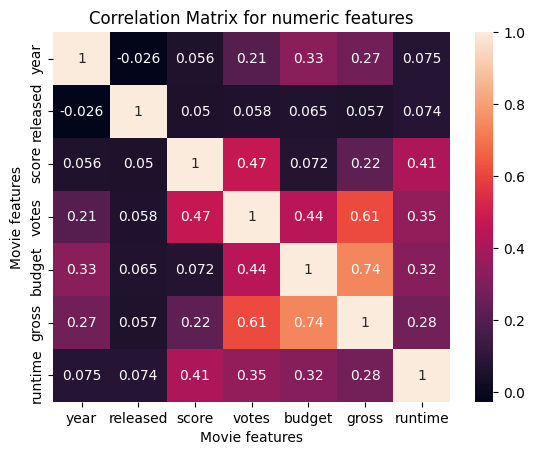

In [ ]:
# Plotting correlations

correlation_matrix = df.corr(method = 'pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [ ]:
# Scaling
scaler = MinMaxScaler()
columns_to_scale = ["year", "score", "votes", "budget", "runtime"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
testdf[columns_to_scale] = scaler.fit_transform(testdf[columns_to_scale])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5416 entries, 0 to 7652
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      5416 non-null   float64
 1   released  5416 non-null   int64  
 2   score     5416 non-null   float64
 3   votes     5416 non-null   float64
 4   budget    5416 non-null   float64
 5   gross     5416 non-null   float64
 6   runtime   5416 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 338.5 KB


In [ ]:
df.head()

,year,released,score,votes,budget,gross,runtime
0,0.0,6,0.878378,0.386200,0.053355,46998772.0,0.399038
1,0.0,7,0.527027,0.027004,0.012624,58853106.0,0.197115
2,0.0,6,0.918919,0.499959,0.050546,538375067.0,0.293269
3,0.0,7,0.783784,0.092010,0.009815,83453539.0,0.120192
4,0.0,7,0.729730,0.044922,0.016837,39846344.0,0.168269


In [ ]:
testdf.head()

,year,released,score,votes,budget,gross,runtime
0,0.0,6,0.896552,0.759471,1.000000,46998772.0,1.000000
1,0.0,7,0.000000,0.000000,0.064516,58853106.0,0.275862
2,0.0,6,1.000000,1.000000,0.935484,538375067.0,0.620690
3,0.0,7,0.655172,0.137445,0.000000,83453539.0,0.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X = df.drop(columns=["gross"])
y = df["gross"]
X_dummy = testdf.drop(columns=["gross"])
y_dummy = testdf["gross"]
X_poly = poly.fit_transform(X)
X_poly_dummy = poly.fit_transform(X_dummy)

print(X_poly)

[[1.00000000e+00 0.00000000e+00 6.00000000e+00 ... 2.84673808e-03
  2.12906300e-02 1.59231694e-01]
 [1.00000000e+00 0.00000000e+00 7.00000000e+00 ... 1.59360535e-04
  2.48834682e-03 3.88544749e-02]
 [1.00000000e+00 0.00000000e+00 6.00000000e+00 ... 2.55487746e-03
  1.48235266e-02 8.60068417e-02]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.41635623e-01
  8.98050464e-02 3.33764793e-02]
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 ... 1.43794931e-01
  6.74543834e-02 3.16429364e-02]
 [1.00000000e+00 1.00000000e+00 8.00000000e+00 ... 5.04928019e-02
  9.29073027e-02 1.70950444e-01]]


# Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [ ]:
print("X_test values:")
print(X_test)

print("\ny_test values:")
print(y_test)


X_test values:
[[1.00000000e+00 1.00000000e-01 8.00000000e+00 ... 6.38293482e-04
  2.91513124e-03 1.33136095e-02]
 [1.00000000e+00 9.25000000e-01 2.00000000e+00 ... 7.09877511e-03
  2.30888993e-02 7.50970784e-02]
 [1.00000000e+00 9.00000000e-01 1.00000000e+00 ... 4.92931049e-03
  2.16027841e-02 9.46745562e-02]
 ...
 [1.00000000e+00 9.00000000e-01 1.00000000e+00 ... 1.26213069e-02
  2.10646106e-02 3.51562500e-02]
 [1.00000000e+00 5.50000000e-01 1.10000000e+01 ... 1.32603576e-02
  2.60202905e-02 5.10586169e-02]
 [1.00000000e+00 1.75000000e-01 6.00000000e+00 ... 1.13512250e-03
  7.12706480e-03 4.47485207e-02]]

y_test values:
513      25348610.0
7151     16080475.0
6883    236225193.0
4714      3947579.0
1957     15565363.0
           ...     
2901    150270147.0
6674    203427584.0
7030    124608438.0
4045    242875078.0
1100     40050884.0
Name: gross, Length: 1625, dtype: float64


In [ ]:
model = LinearRegression().fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
prediction_dummy = model.predict(X_poly_dummy)

In [ ]:
print(prediction_dummy)

[2.79511292e+09 1.01065476e+08 2.61352983e+09 2.23485357e+08]


# Evaluation

In [ ]:
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8333413450003977.0
Mean Absolute Error: 48392921.759650744
R-squared: 0.7483476241076079


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.7 MB/s e

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load data
df = pd.read_csv("movies.csv")
testdf = pd.read_csv("Test_dummy.csv")

# Data Preprocessing
df = df.dropna()
df = df.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])
testdf = testdf.dropna()
testdf = testdf.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])

# Drop rows with gross > 1x10^9
df = df[df["gross"] <= 1e9]

df["released"] = df["released"].str.split(" ").str[0]
testdf["released"] = testdf["released"].str.split(" ").str[0]
month_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df["released"] = df["released"].replace(month_num)
testdf["released"] = testdf["released"].replace(month_num)
df["released"] = df["released"].astype(int)
df = df[df["released"]<13]

# Data Scaling
scaler = MinMaxScaler()
columns_to_scale = ["year", "score", "votes", "budget", "runtime"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
testdf[columns_to_scale] = scaler.fit_transform(testdf[columns_to_scale])

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X = df.drop(columns=["gross"])
y = df["gross"]
X_dummy = testdf.drop(columns=["gross"])
y_dummy = testdf["gross"]
X_poly = poly.fit_transform(X)
X_poly_dummy = poly.fit_transform(X_dummy)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)
prediction = model.predict(X_test)
prediction_dummy = model.predict(X_poly_dummy)

print(prediction_dummy)



[ 4.94456681e+08  5.62364324e+07 -4.07650045e+07  2.11739079e+08
  2.31642197e+09]


<ipython-input-3-8824ca6aea24>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


[2.79511292e+09 1.01065476e+08 2.61352983e+09 2.23485357e+08]
              year     released        score        votes       budget  \
count  5416.000000  5416.000000  5416.000000  5416.000000  5416.000000   
mean      0.541797     6.661558     0.607115     0.047910     0.101209   
std       0.263442     3.462999     0.130113     0.076865     0.116808   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.325000     4.000000     0.527027     0.007836     0.028074   
50%       0.550000     7.000000     0.621622     0.021587     0.061782   
75%       0.775000    10.000000     0.702703     0.053777     0.126390   
max       1.000000    12.000000     1.000000     1.000000     1.000000   

              gross      runtime  
count  5.416000e+03  5416.000000  
mean   1.033246e+08     0.217113  
std    1.873631e+08     0.087119  
min    3.090000e+02     0.000000  
25%    1.077160e+07     0.153846  
50%    3.707099e+07     0.201923  
75%    1.126608e+08     0.

<Figure size 1000x600 with 0 Axes>

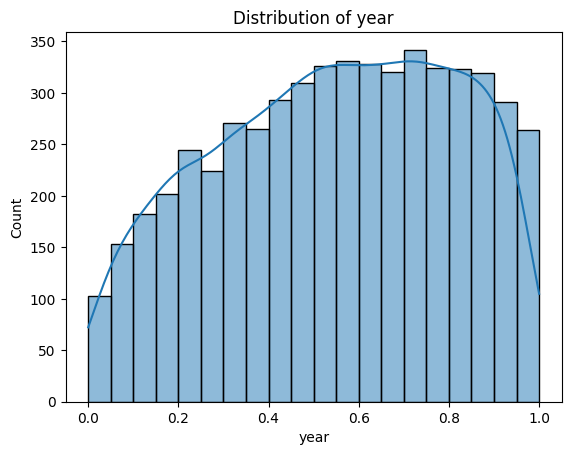

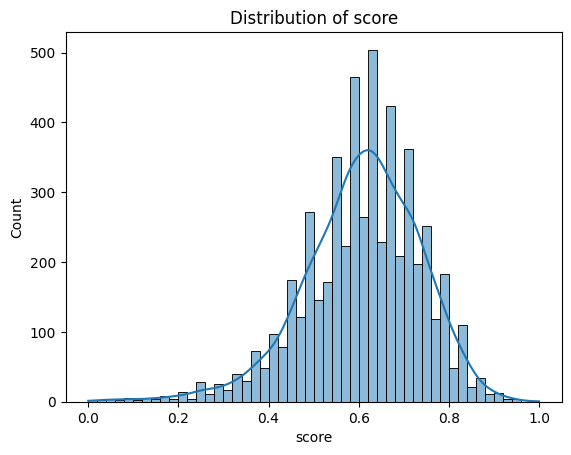

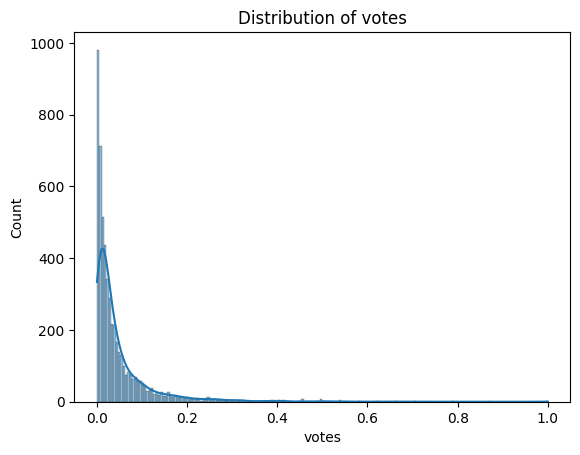

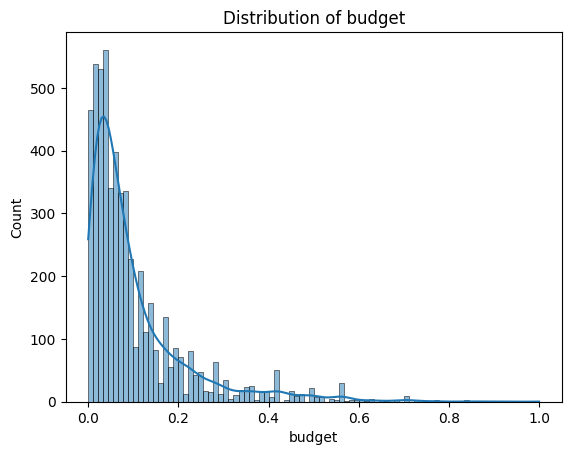

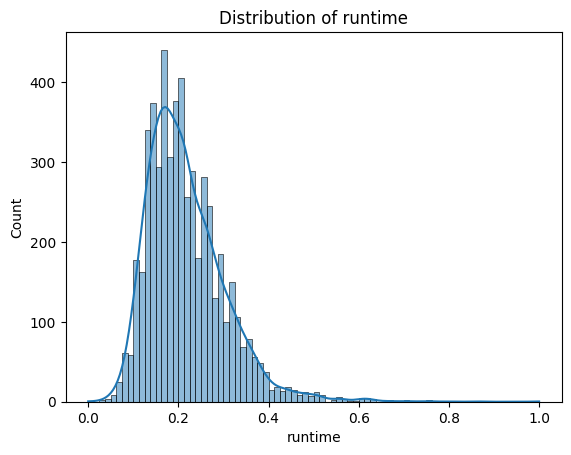

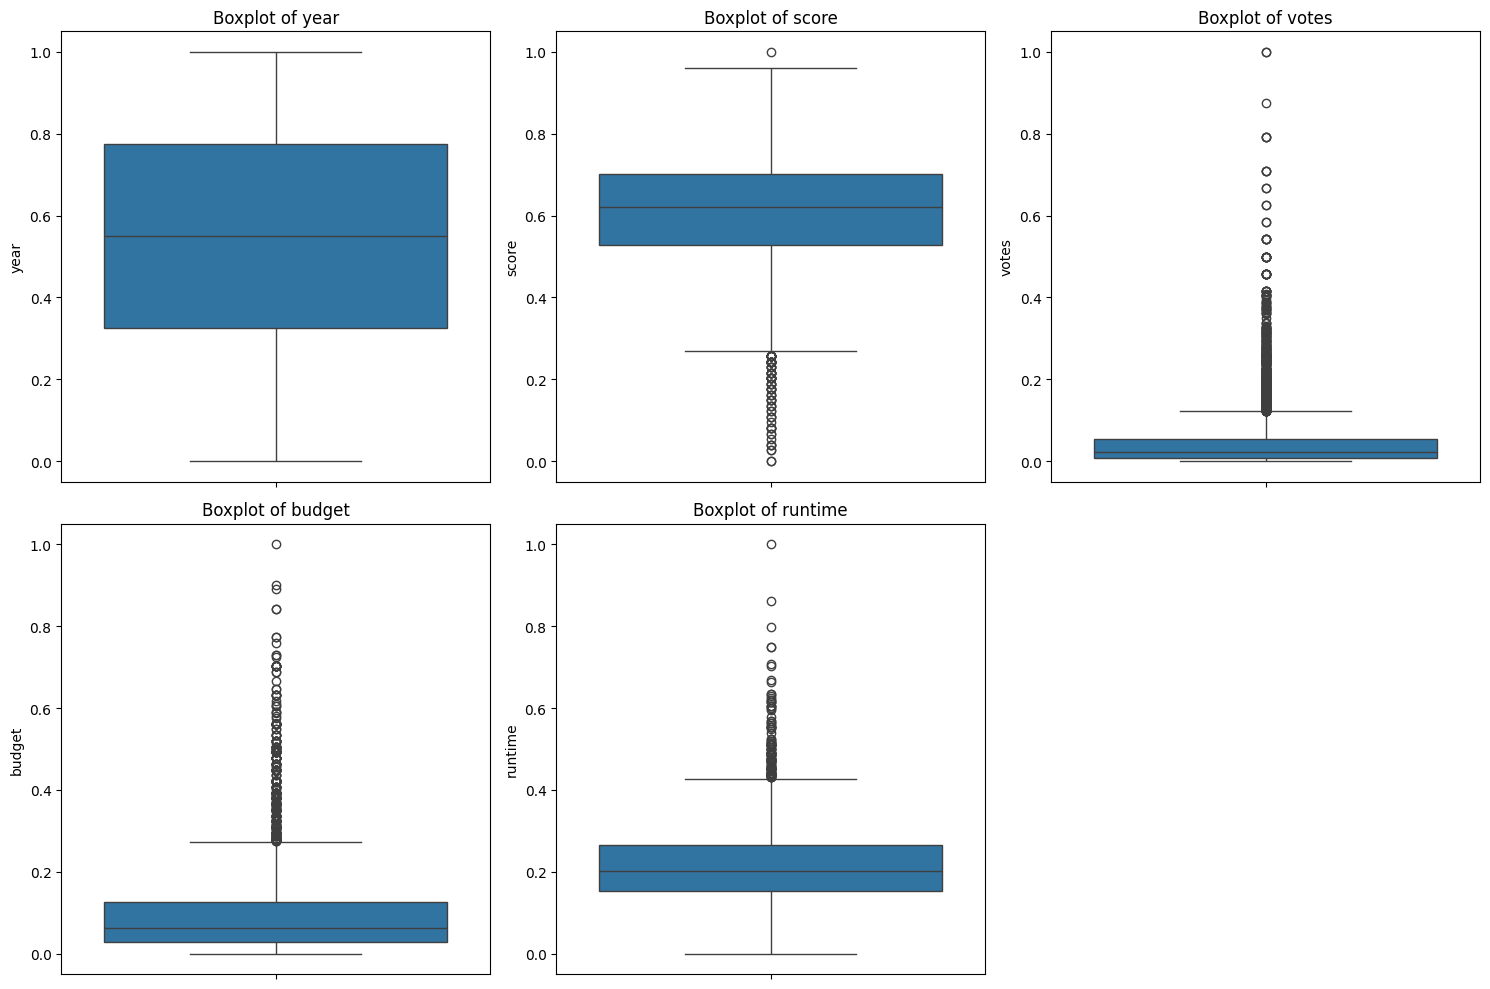

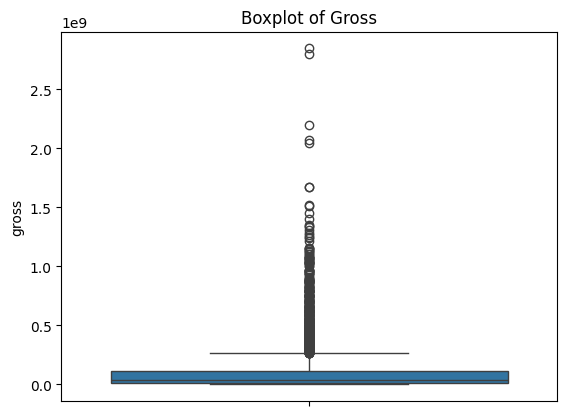

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load data
df = pd.read_csv("movies.csv")
testdf = pd.read_csv("Test_dummy.csv")

# Data Preprocessing
df = df.dropna()
df = df.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])
testdf = testdf.dropna()
testdf = testdf.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])

df["released"] = df["released"].str.split(" ").str[0]
testdf["released"] = testdf["released"].str.split(" ").str[0]
month_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df["released"] = df["released"].replace(month_num)
testdf["released"] = testdf["released"].replace(month_num)
df["released"] = df["released"].astype(int)
df = df[df["released"]<13]

# Data Scaling
scaler = MinMaxScaler()
columns_to_scale = ["year", "score", "votes", "budget", "runtime"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
testdf[columns_to_scale] = scaler.fit_transform(testdf[columns_to_scale])

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X = df.drop(columns=["gross"])
y = df["gross"]
X_dummy = testdf.drop(columns=["gross"])
y_dummy = testdf["gross"]
X_poly = poly.fit_transform(X)
X_poly_dummy = poly.fit_transform(X_dummy)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)
prediction = model.predict(X_test)
prediction_dummy = model.predict(X_poly_dummy)

print(prediction_dummy)

print(df.describe())

plt.figure(figsize=(10, 6))
for column in columns_to_scale:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

plt.figure()
sns.boxplot(y=df["gross"])
plt.title('Boxplot of Gross')
plt.show()


[3.07198984e+08 1.01856967e+07 1.65970751e+08 1.30982203e+08
 2.70126843e+09]
              year     released        score        votes       budget  \
count  5416.000000  5416.000000  5416.000000  5416.000000  5416.000000   
mean      0.541797     6.661558     0.607115     0.047910     0.101209   
std       0.263442     3.462999     0.130113     0.076865     0.116808   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.325000     4.000000     0.527027     0.007836     0.028074   
50%       0.550000     7.000000     0.621622     0.021587     0.061782   
75%       0.775000    10.000000     0.702703     0.053777     0.126390   
max       1.000000    12.000000     1.000000     1.000000     1.000000   

              gross      runtime  
count  5.416000e+03  5416.000000  
mean   1.033246e+08     0.217113  
std    1.873631e+08     0.087119  
min    3.090000e+02     0.000000  
25%    1.077160e+07     0.153846  
50%    3.707099e+07     0.201923  
75%    1.1

<Figure size 1000x600 with 0 Axes>

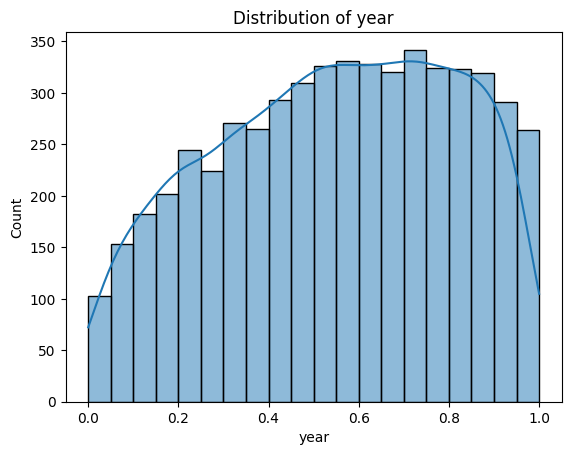

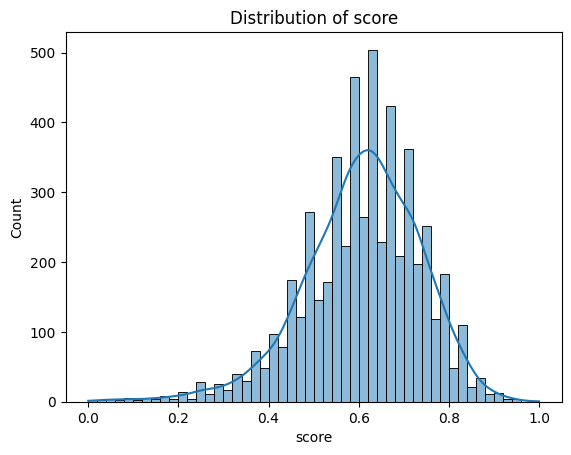

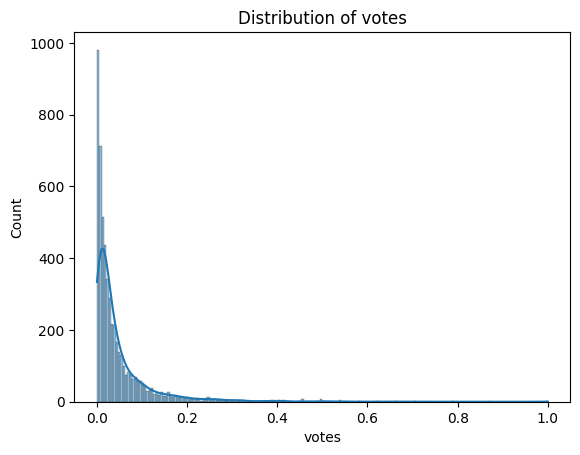

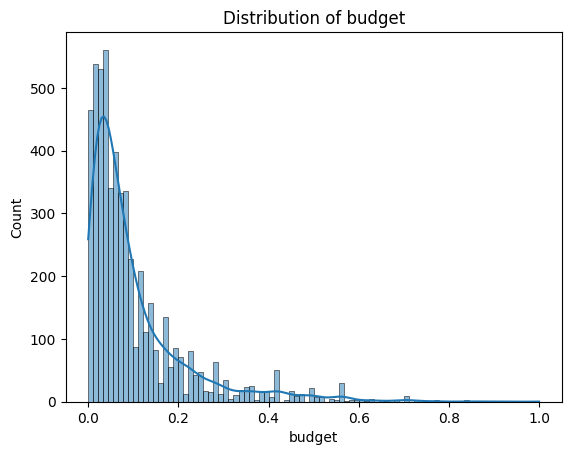

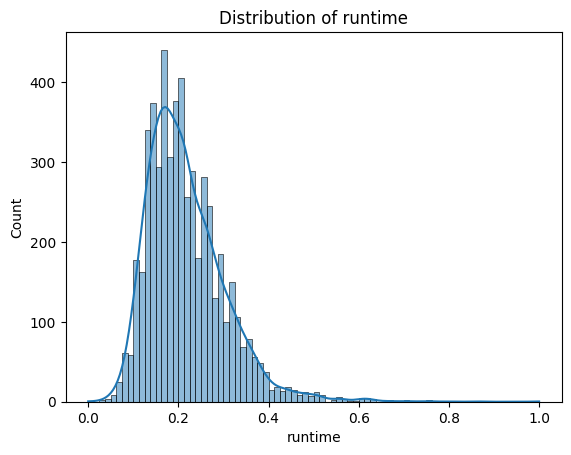

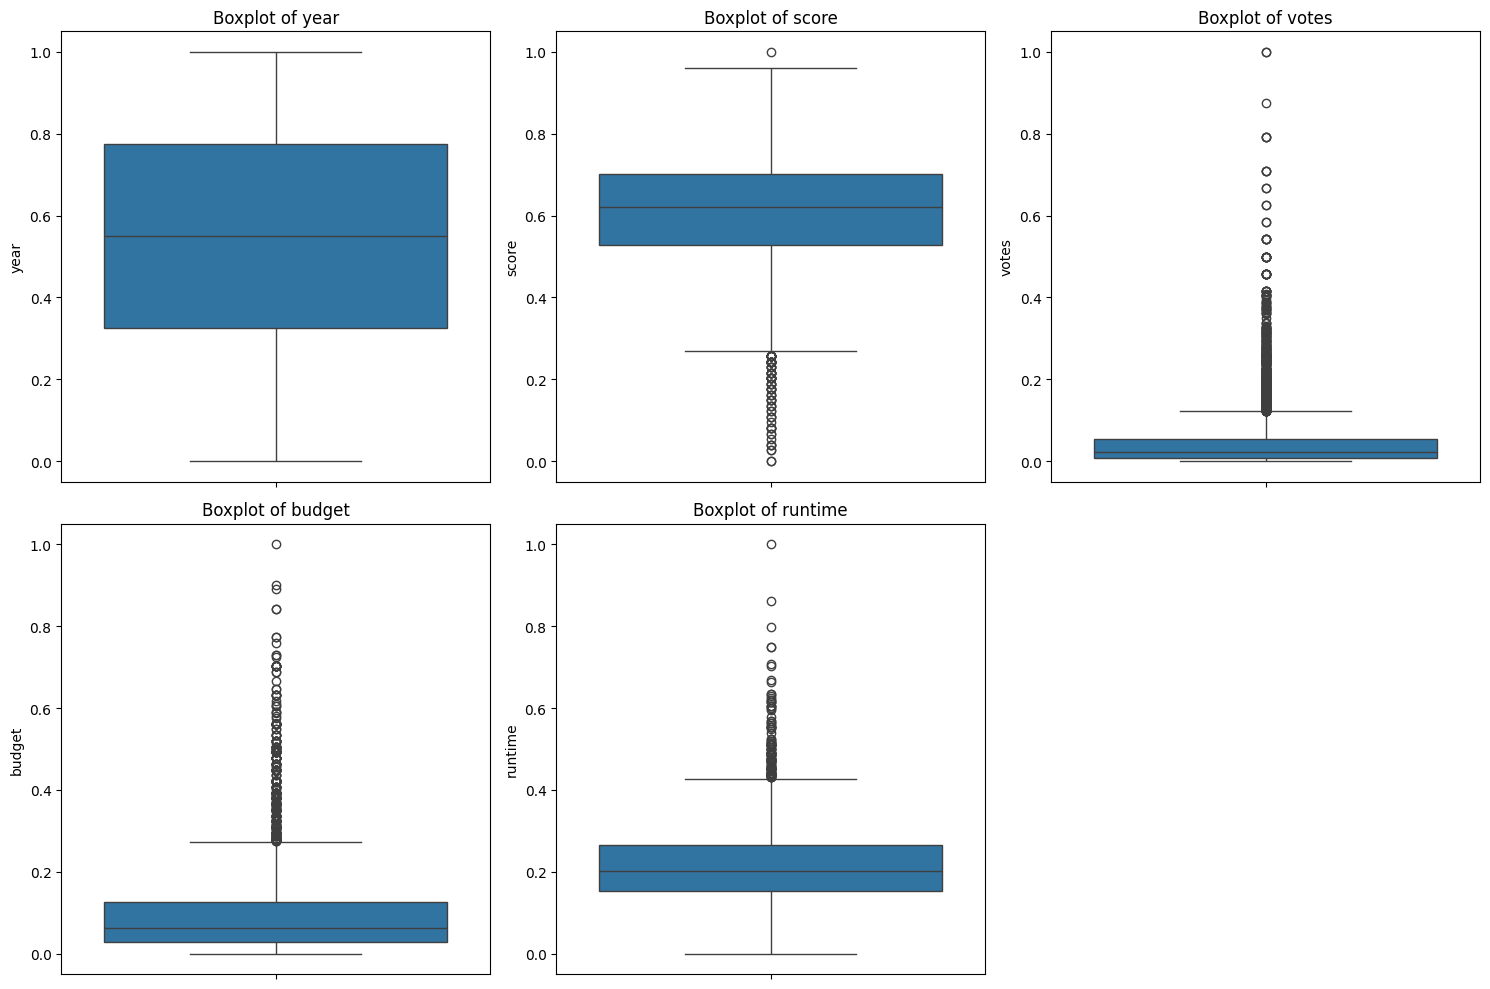

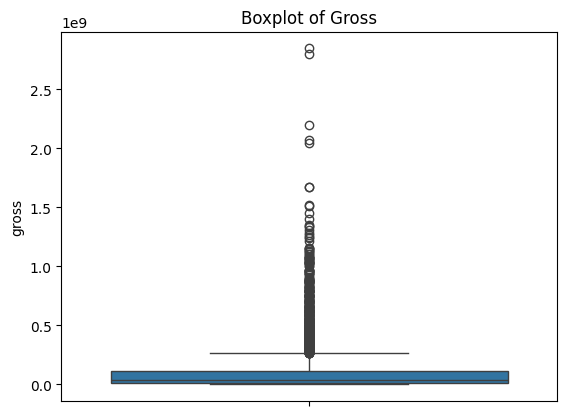

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Load data
df = pd.read_csv("movies.csv")
testdf = pd.read_csv("Test_dummy.csv")

# Data Preprocessing
df = df.dropna()
df = df.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])
testdf = testdf.dropna()
testdf = testdf.drop(columns=["name","writer","country","star","rating", "genre", "director", "company"])

# Drop rows with gross > 1x10^9
# df = df[df["gross"] <= 1e9]

df["released"] = df["released"].str.split(" ").str[0]
testdf["released"] = testdf["released"].str.split(" ").str[0]
month_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df["released"] = df["released"].replace(month_num)
testdf["released"] = testdf["released"].replace(month_num)
df["released"] = df["released"].astype(int)
df = df[df["released"] < 13]

# Data Scaling
scaler = MinMaxScaler()
columns_to_scale = ["year", "score", "votes", "budget", "runtime"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
testdf[columns_to_scale] = scaler.fit_transform(testdf[columns_to_scale])

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X = df.drop(columns=["gross"])
y = df["gross"]
X_dummy = testdf.drop(columns=["gross"])
y_dummy = testdf["gross"]
X_poly = poly.fit_transform(X)
X_poly_dummy = poly.fit_transform(X_dummy)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Regularized Linear Regression (Ridge)
model = Ridge().fit(X_train, y_train)
prediction = model.predict(X_test)
prediction_dummy = model.predict(X_poly_dummy)

# Custom Constraint to ensure non-negative predictions
prediction = np.maximum(prediction, 0)
prediction_dummy = np.maximum(prediction_dummy, 0)

print(prediction_dummy)

# EDA Process
# 1. Descriptive Statistics
print(df.describe())

# 2. Visualizing the distribution of the data
plt.figure(figsize=(10, 6))
for column in columns_to_scale:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# 3. Checking for outliers using boxplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 4. Checking for outliers in the target variable
plt.figure()
sns.boxplot(y=df["gross"])
plt.title('Boxplot of Gross')
plt.show()


In [ ]:
import gradio as gr
import numpy as np
from sklearn.linear_model import LinearRegression

def ml_model(year, votes, budget, runtime, score, month):
    year = np.array([[float(year)]])
    votes = np.array([[float(votes)]])
    budget = np.array([[float(budget)]])
    runtime = np.array([[float(runtime)]])
    score = np.array([[float(score)]])
    month = np.array([[int(month_num.get(month, None))]])

    features = np.hstack([year, votes, budget, runtime, score, month])#, company, genre, rating, director])  # Combine into a single 2D array
    # features_trans = scaler.fit_transform(features)
    features_trans = features
    X_poly_feature = poly.fit_transform(features_trans)
    prediction = model.predict(X_poly_feature)  # Predict using the combined features

    return str(prediction[0])

demo = gr.Interface(
    title="Movie Sales Predictor",
    fn=ml_model,
    inputs=["text", "text", "text", "text", "text", "text"],
    outputs="text"
)

demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://68e2d1a971b46ec31b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Load data
df = pd.read_csv("movies.csv")
testdf = pd.read_csv("Test_dummy.csv")

# Data Preprocessing
df = df.dropna()
df = df.drop(columns=["name", "writer", "country", "star", "rating", "genre", "director", "company"])
testdf = testdf.dropna()
testdf = testdf.drop(columns=["name", "writer", "country", "star", "rating", "genre", "director", "company"])

df["released"] = df["released"].str.split(" ").str[0]
testdf["released"] = testdf["released"].str.split(" ").str[0]
month_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
df["released"] = df["released"].replace(month_num)
testdf["released"] = testdf["released"].replace(month_num)
df["released"] = df["released"].astype(int)
df = df[df["released"] < 13]
testdf["released"] = testdf["released"].astype(int)
testdf = testdf[testdf["released"] < 13]

# Data Scaling
scaler = MinMaxScaler()
columns_to_scale = ["year", "score", "votes", "budget", "runtime"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
testdf[columns_to_scale] = scaler.transform(testdf[columns_to_scale])

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X = df.drop(columns=["gross"])
y = df["gross"]
X_dummy = testdf.drop(columns=["gross"])
y_dummy = testdf["gross"]
X_poly = poly.fit_transform(X)
X_poly_dummy = poly.fit_transform(X_dummy)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predictions
prediction = model.predict(X_test)
prediction_dummy = model.predict(X_poly_dummy)

# Custom Constraint to ensure non-negative predictions
prediction = np.maximum(prediction, 0)
prediction_dummy = np.maximum(prediction_dummy, 0)

print("Normal model prediction: ", prediction_dummy)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



Normal model prediction:  [3.87642478e+08 9.82546326e+07 3.03115944e+08 1.17643278e+08
 1.40020381e+09]
Mean Squared Error: 8309044210267414.0
Mean Absolute Error: 47783851.27623535
R-squared: 0.7490835262820518


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import gradio as gr

# Load and preprocess data
def load_and_preprocess_data():
    df = pd.read_csv("movies.csv")
    df = df.dropna()
    df = df.drop(columns=["name", "writer", "country", "star", "rating", "genre", "director", "company"])

    df["released"] = df["released"].str.split(" ").str[0]
    month_num = {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }
    df["released"] = df["released"].replace(month_num)
    df["released"] = df["released"].astype(int)
    df = df[df["released"] < 13]

    scaler = MinMaxScaler()
    columns_to_scale = ["year", "score", "votes", "budget", "runtime"]
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    poly = PolynomialFeatures(degree=2)

    X = df.drop(columns=["gross"])
    y = df["gross"]
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    return model, scaler, poly, columns_to_scale, X.columns.tolist()

model, scaler, poly, columns_to_scale, feature_names = load_and_preprocess_data()

def predict_gross(year, votes, budget, runtime, score, month):
    try:
        # Ensure the input data follows the correct order and scaling
        data = pd.DataFrame([[year, month, score, votes, budget, runtime]],
                            columns=feature_names)
        print(f"Original data: {data}")
        data[columns_to_scale] = scaler.transform(data[columns_to_scale])
        print(f"Scaled data: {data}")
        data_poly = poly.transform(data)
        print(f"Polynomial features: {data_poly}")
        prediction = model.predict(data_poly)
        # prediction = np.maximum(prediction, 0)
        print(f"Prediction: {prediction}")
        return prediction[0]
    except Exception as e:
        return str(e)

# Create Gradio interface
inputs = [
    gr.Number(label="Year"),
    gr.Number(label="Votes"),
    gr.Number(label="Budget"),
    gr.Number(label="Runtime"),
    gr.Number(label="Score"),
    gr.Number(label="Month (1-12)")
]

outputs = gr.Textbox(label="Predicted Gross")

gr.Interface(fn=predict_gross, inputs=inputs, outputs=outputs, title="Gross Prediction",
             description="Predict the gross revenue of a movie based on various features.").launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://be3109037a2dd707e9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Original data:    year  released  score  votes   budget  runtime
0  2032         7      9   1000  1232131      199
Scaled data:    year  released     score     votes    budget   runtime
0   1.3         7  0.959459  0.000335  0.003444  0.653846
Polynomial features: [[1.00000000e+00 1.30000000e+00 7.00000000e+00 9.59459459e-01
  3.35443921e-04 3.44424625e-03 6.53846154e-01 1.69000000e+00
  9.10000000e+00 1.24729730e+00 4.36077098e-04 4.47752013e-03
  8.50000000e-01 4.90000000e+01 6.71621622e+00 2.34810745e-03
  2.41097238e-02 4.57692308e+00 9.20562454e-01 3.21844844e-04
  3.30461465e-03 6.27338877e-01 1.12522624e-07 1.15535147e-06
  2.19328718e-04 1.18628322e-05 2.25200716e-03 4.27514793e-01]]
Prediction: [0.]
Original data:    year  released  score  votes   budget  runtime
0  2032         7      9   1000  1232131      199
Scaled data:    year  released     score     votes    budget   runtime
0   1.3         7  0.959459  0.000335  0.003444  0.653846
Polynomial features: [[1.00000000e+00 

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.6 MB/s e